# Quantum Phase Estimation

This notebook demonstrates the Qiskit `PhaseEstimation` component.

* [Qiskit PhaseEstimation documentation](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseEstimation)

From the documentation:

In the Quantum Phase Estimation (QPE) algorithm, the Phase Estimation circuit is used to estimate the phase $\phi$ of an eigenvalue $e^{2\pi i \phi}$ of a unitary operator $U$, provided with the corresponding eigenstate $|\psi\rangle$. That is
$$
U|\psi\rangle = e^{2\pi i \phi}|\psi\rangle.
$$
This estimation (eand thereby this circuit) is a central routine to several well-known algorithms, such as Shor's algorithm or Quantum Amplitude Estimation.

In [ ]:
# Imports and initialization

import math
import numpy as np
from IPython.display import display, Markdown
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import PhaseEstimation, StatePreparation, XGate, YGate, ZGate

π = math.pi

# Pauli  operators
X = XGate()
Y = YGate()
Z = ZGate()

# Eigenvectors of Z
z0 = np.array([0, 1])
z1 = np.array([1, 0])
# Eigenvectors of Y
y0 = np.array([1, -1j]) / np.sqrt(2)
y1 = np.array([1, 1j]) / np.sqrt(2)

# Sample circuit for $Z$

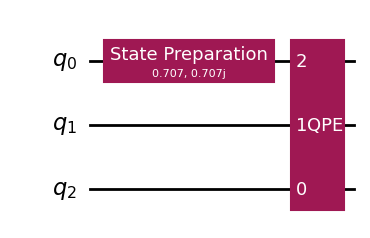

In [66]:
# Functions

def run_statevector(circuit):
    """Runs the circuit and returns the result as a statevector."""
    simulator = Aer.get_backend('statevector_simulator')
    aer_circuit = transpile(circuit, simulator)
    result_statevector = simulator.run(aer_circuit).result().get_statevector()
    return result_statevector

def markdown_statevector(sv):
    """Returns the statevector in markdown format."""
    return sv.draw('latex').data

def markdown_table_statevector(sv):
    """Returns the statevector in markdown format, with '|' replaced by '\|', for use in tables."""
    return markdown_statevector(sv).replace('|', r'\|')

def qpe_circuit(operator, eigenvector, apply_qpe=True):
    """Returns a circuit that prepares the eigenvector of the operator and applies the Quantum Phase Estimation algorithm."""
    circuit = QuantumCircuit(3)
    circuit.append(StatePreparation(eigenvector), [0])
    if apply_qpe:
        qpe = PhaseEstimation(2, operator)
        circuit.append(qpe, [2, 1, 0])
    return circuit

def display_qpe_circuit(operator, eigenvector, title):
    """Displays the circuit that prepares the eigenvector of the operator and applies the Quantum Phase Estimation algorithm."""
    input_circuit = qpe_circuit(operator, eigenvector, apply_qpe=False)
    circuit = qpe_circuit(operator, eigenvector)
    display(Markdown(f"# {title}"))
    display(circuit.draw('mpl'))
    display(Markdown("Input state: " + markdown_statevector(run_statevector(input_circuit))))
    display(Markdown("Output state: " + markdown_statevector(run_statevector(circuit))))

# Show one example.
z_circuit = qpe_circuit(Y, y1)
display(Markdown("# Sample circuit for $Z$"))
display(z_circuit.draw('mpl'))

## Examples

Below are some example, using the Z and Y operators. 
First we give a summary table showing the results of the QPE algorithm for each eigenvector of each operator.
Following that is a detailed version of eac eigenvector for each operator, showing the circuit and the results.

In [65]:
data = [
    {'name': '$Z$', 'operator': Z, 'eigenvector': z0},
    {'name': '$Z$', 'operator': Z, 'eigenvector': z1},
    {'name': '$Y$', 'operator': Y, 'eigenvector': y0},
    {'name': '$Y$', 'operator': Y, 'eigenvector': y1},
]

table = "| Operator | Input statevector | Output statevector |\n"
table += "| --- | --- | --- |\n"
for d in data:
    name = d['name']
    operator = d['operator']
    eigenvector = d['eigenvector']
    input_statevector = markdown_table_statevector(run_statevector(qpe_circuit(operator, eigenvector, apply_qpe=False)))
    output_statevector = markdown_table_statevector(run_statevector(qpe_circuit(operator, eigenvector)))
    table += f"| ${name}$ | {input_statevector} | {output_statevector} |\n"
display(Markdown("# Phase Estimation Examples"))
display(Markdown(table))

# Phase Estimation Examples

| Operator | Input statevector | Output statevector |
| --- | --- | --- |
| $$Z$$ | $$ \|001\rangle$$ | $$ \|101\rangle$$ |
| $$Z$$ | $$ \|000\rangle$$ | $$ \|000\rangle$$ |
| $$Y$$ | $$\frac{\sqrt{2}}{2} \|000\rangle- \frac{\sqrt{2} i}{2} \|001\rangle$$ | $$\frac{\sqrt{2}}{2} \|100\rangle- \frac{\sqrt{2} i}{2} \|101\rangle$$ |
| $$Y$$ | $$\frac{\sqrt{2}}{2} \|000\rangle+\frac{\sqrt{2} i}{2} \|001\rangle$$ | $$\frac{\sqrt{2}}{2} \|000\rangle+\frac{\sqrt{2} i}{2} \|001\rangle$$ |


# Z operator with eigenvector $z_0 = |1\rangle$, eigenvalue -1

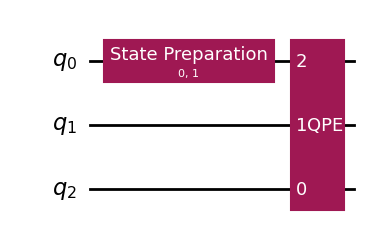

Input state: $$ |001\rangle$$

Output state: $$ |101\rangle$$

In [68]:
display_qpe_circuit(Z, z0, "Z operator with eigenvector $z_0 = |1\\rangle$, eigenvalue -1")

# Z operator with eigenvector $z_1 = |0\rangle$, eigenvalue +1

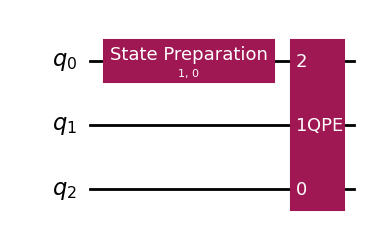

Input state: $$ |000\rangle$$

Output state: $$ |000\rangle$$

In [69]:
display_qpe_circuit(Z, z1, "Z operator with eigenvector $z_1 = |0\\rangle$, eigenvalue +1")

# Y operator with eigenvector $y_0 = \frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$, eigenvalue -1

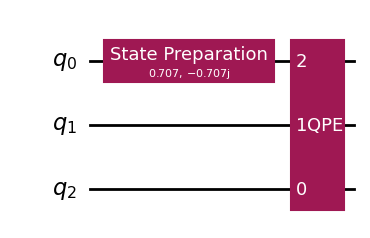

Input state: $$\frac{\sqrt{2}}{2} |000\rangle- \frac{\sqrt{2} i}{2} |001\rangle$$

Output state: $$\frac{\sqrt{2}}{2} |100\rangle- \frac{\sqrt{2} i}{2} |101\rangle$$

In [70]:
display_qpe_circuit(Y, y0, "Y operator with eigenvector $y_0 = \\frac{1}{\\sqrt{2}}(|0\\rangle-i|1\\rangle)$, eigenvalue -1")

# Y operator with eigenvector $y_1 = \frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle)$, eigenvalue +1

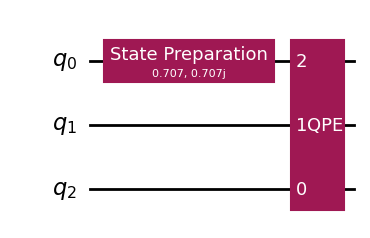

Input state: $$\frac{\sqrt{2}}{2} |000\rangle+\frac{\sqrt{2} i}{2} |001\rangle$$

Output state: $$\frac{\sqrt{2}}{2} |000\rangle+\frac{\sqrt{2} i}{2} |001\rangle$$

In [71]:
display_qpe_circuit(Y, y1, "Y operator with eigenvector $y_1 = \\frac{1}{\\sqrt{2}}(|0\\rangle+i|1\\rangle)$, eigenvalue +1")